In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3><em>Temperature and Pressure values</em></h3>

In [2]:
temperature = np.arange(-30, 40+0.1, 0.1) #temperature values for potential temperature and mixing ratio from -30 to 40 at a resolution of 0.1
temperature_K = temperature + 273.15 #converting temperature values to kelvin
pressure = np.arange(250, 1050+0.1, 1) #pressure values for potential temperature and mixing ratio from 250 to 1050 at a resolution of 1
pressure_pa = pressure*100  # converting pressure from hecto pascal to pascal

# len(temperature_K), len(pressure)

<h3><em>potential temperature function</em></h3>

In [3]:
def potential_temperature(po=1000, rd=287.05, cpd=1005.2):
    t = temperature_K.reshape(1, 701) # reshaped the temperature values to 2D
    p = pressure.reshape(801,1) #reshaped the pressure values to 2D
    theta = t*(po/p)**(rd/cpd) # calculated for potential temperature in 2D
    return theta

In [4]:
potential_temperature = potential_temperature()
potential_temperature.shape

(801, 701)

<h3><em>saturation vapor pressure function</em></h3>

In [6]:
def vapour_pressure():
    T = temperature_K; a = 0.58002206*10**4; b = 0.13914993*10**1; c = 0.48640239*10**-1; d = 0.41764768*10**-4; ed = 0.14452093*10**-7; f = 0.65459673*10**1
    log_es = -(a/T) + (b) - (c)*T + ((d)*(T**2)) - ((ed)*(T**3)) + ((f)*(np.log(T)))
    log_es
    # #taking the log of es
    es = np.exp(log_es)
    return es

In [7]:
vapour_pressure = vapour_pressure()

### _calculating for saturation mixing ratio_

In [9]:
rd = 287.05; rv = 461.51
ES = vapour_pressure.reshape(1, 701)
P = pressure_pa.reshape(801, 1)

In [10]:
saturation_mixing_ratio = (rd/rv)*(ES/(P-ES))
saturation_mixing_ratio

array([[0.00127296, 0.00128502, 0.00129719, ..., 0.25677548, 0.25872131,
        0.26068482],
       [0.00126788, 0.00127989, 0.00129201, ..., 0.25533251, 0.2572642 ,
        0.2592134 ],
       [0.00126284, 0.0012748 , 0.00128687, ..., 0.25390566, 0.25582342,
        0.2577585 ],
       ...,
       [0.00030319, 0.00030606, 0.00030895, ..., 0.04660366, 0.04687186,
        0.04714153],
       [0.0003029 , 0.00030577, 0.00030866, ..., 0.0465559 , 0.04682382,
        0.04709319],
       [0.00030261, 0.00030548, 0.00030836, ..., 0.04650825, 0.04677587,
        0.04704494]])

In [12]:
saturation_mixing_ratio.shape

(801, 701)

### _calculating for equivalent potential temperature_

In [26]:
def equivalent_potential_temperature():
    lvo = 2.5*10**6; cpd=1005.2
    inner = ( (lvo*saturation_mixing_ratio) / (cpd*temperature_K) )
    equivalent_potential_temperature = potential_temperature*np.exp(inner)
    return equivalent_potential_temperature

In [27]:
equivalent_potential_temperature = equivalent_potential_temperature()
equivalent_potential_temperature

array([[ 365.97913678,  366.17283697,  366.3669293 , ..., 3578.00044594,
        3632.53463068, 3688.38268783],
       [ 365.54316334,  365.73646021,  365.93014716, ..., 3533.17389367,
        3586.63517198, 3641.37705111],
       [ 365.10951512,  365.30241169,  365.49569629, ..., 3489.37194791,
        3541.79094403, 3595.45839385],
       ...,
       [ 240.66151367,  240.76724245,  240.87303173, ...,  447.20734961,
         448.25145347,  449.30256495],
       [ 240.5952654 ,  240.70095863,  240.80671229, ...,  446.91593238,
         447.95836362,  449.00778743],
       [ 240.52909914,  240.63475688,  240.74047496, ...,  446.62516794,
         447.66593156,  448.71367272]])

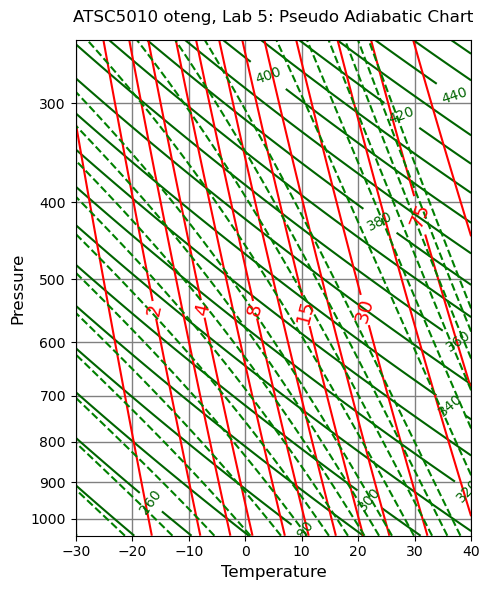

In [67]:
ws_levels = np.array([0.5, 1, 2, 3, 4, 6, 8, 11, 15, 20, 30, 50, 75, 125], dtype=int)
vals = [1000, 900, 800, 700, 600, 500, 400, 300]
levels = np.arange(240,480,10)
#equivalent potential temperature levels
ept_levels1 = np.arange(250, 360, 10).tolist()
ept_levles2 = np.arange(370, 450, 20).tolist()
ept_levels3 = np.arange(510, 870, 60).tolist()
ept_levels = ept_levels1+ept_levles2+ept_levels3
################################################
loc = [(-18, 550), (-10, 550), (0, 550), (10, 550), (20, 550),(35, 400)]
fig, ax = plt.subplots(figsize=(5, 6))
ax1 = ax.contour(temperature, pressure, potential_temperature, levels=levels, colors='darkgreen')  #potential temperature
ax.clabel(ax1, levels[::2], fmt='%d', fontsize=10)
ax2 = ax.contour(temperature, pressure, saturation_mixing_ratio*1000, levels=ws_levels, colors='red') #saturation mixing ratio
ax.clabel(ax2, ws_levels[::2], fmt='%d', inline_spacing=2 ,fontsize=14, manual=loc)
ax3 = ax.contour(temperature, pressure, equivalent_potential_temperature, levels=ept_levels, colors='green', linestyles='--') #equilvalent potential temperature
ax.set_yscale('log') 
ax.set_ylim(1050, 250)
ax.set_xlim(-30, 40)
ax.set_yticks(ticks=vals, labels=vals)
ax.set_xlabel('Temperature', fontsize=12)
ax.set_ylabel('Pressure', fontsize=12)
ax.grid(visible=True, linestyle='solid',color='grey', linewidth=1)
ax.set_title("ATSC5010 oteng, Lab 5: Pseudo Adiabatic Chart", fontsize=12, pad=13)
plt.tight_layout()

### Plot

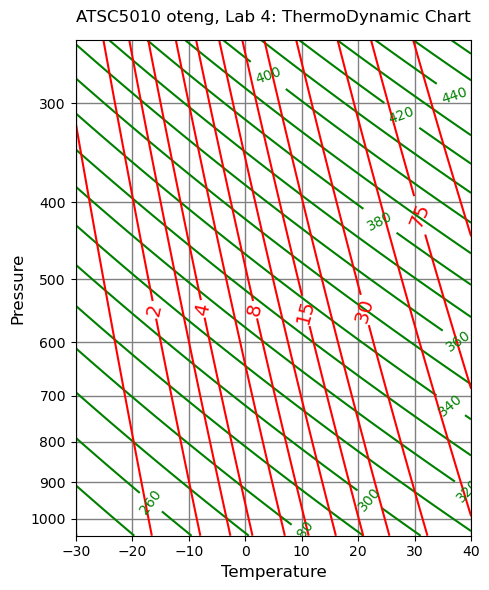

In [9]:
ws_levels = np.array([0.5, 1, 2, 3, 4, 6, 8, 11, 15, 20, 30, 50, 75, 125], dtype=int)
vals = [1000, 900, 800, 700, 600, 500, 400, 300]
levels = np.arange(240,480,10)
loc = [(-18, 550), (-10, 550), (0, 550), (10, 550), (20, 550),(35, 400)]
fig, ax = plt.subplots(figsize=(5, 6))
ax1 = ax.contour(temperature, pressure, potential_temperature, levels=levels, colors='green')
ax.clabel(ax1, levels[::2], fmt='%d', fontsize=10)
ax2 = ax.contour(temperature, pressure, saturation_mixing_ratio*1000, levels=ws_levels, colors='red')
ax.clabel(ax2, ws_levels[::2], fmt='%d', inline_spacing=2 ,fontsize=14, manual=loc)
ax.set_yscale('log') 
ax.set_ylim(1050, 250)
ax.set_xlim(-30, 40)
ax.set_yticks(ticks=vals, labels=vals)
ax.set_xlabel('Temperature', fontsize=12)
ax.set_ylabel('Pressure', fontsize=12)
ax.grid(visible=True, linestyle='solid',color='grey', linewidth=1)
ax.set_title("ATSC5010 oteng, Lab 4: ThermoDynamic Chart", fontsize=12, pad=13)
plt.tight_layout()

# # QUESTION ONE
# #=====================================================
# ax.plot(10, 800, color='red', marker='.', markersize=11)
# ax.text(11, 810, 'Q1', style='italic', fontsize=11) #added text(Q1) to indicated point

# # QUESTION THREE
# #=====================================================
# ax.plot(0, 700, color='black', marker='.', markersize=11)
# ax.text(1, 710, 'Q3', style='italic', fontsize=11) #added text(Q3) to indicated point


# # QUESTION FOUR
# #=====================================================
# ax.plot(-7.5, 400, color='black', marker='.', markersize=11)
# ax.text(-6, 403, 'Q4', style='italic', fontsize=11) #added text(Q4) to indicated point
# ax.plot([0, -7.5], [700, 400], color='black') # line joining Q3 and Q4
# ax.plot([-7, -7.5], [1050, 400], color='blue') # line joining Q3 and Q4


# # QUESTION FIVE
# #=====================================================
# ax.plot(5, 1000, color='black', marker='.', markersize=11)
# ax.text(6, 1010, 'Q5', style='italic', fontsize=11) #added text(Q5) to indicated point
# ax.plot([-7, 5], [420, 1000], color='black', linestyle='--') # line joining Q4 and Q5

# #QUESTION SIX
# ax.plot(5, 900, color='blue', marker='.', markersize=11)
# ax.plot(25, 900, color='blue', marker='.', markersize=11)

# ax.plot([5, -1], [900, 600], color='blue', linestyle='--') # line connecting mixing ratio
# ax.plot([25, -2.5],[900, 640], color='blue', linestyle='--') #line following potential temperature
# ax.plot(1, 670, color='blue', marker='.', markersize=11)
# ax.text(1, 660, 'LCL', style='italic', fontsize=11, fontweight='bold'); #added text(Q6) to indicated point

# fig.savefig('lab4_oteng.jpg', dpi=100)

<h1>QUESTIONS</h1>

<div>
    <ol>
        <li>Consider a parcel at 10 C and 800 mb. What is the parcel’s potential temperature? What is the parcel’s saturation mixing ratio? From this information, can you determine the parcel’s mixing ratio? Can you determine its dewpoint?</li>
        <li>If the parcel in (1) is saturated, what is the parcel’s mixing ratio? What is its dewpoint?</li>
        <li>Consider a parcel with a dewpoint of 0 C at 700 mb. What is the parcels mixing ratio?</li>
        <li>Now lift the parcel in (3) to 400 mb (assuming it doesn’t saturate). What is the parcel’s mixing ratio? What is the parcel’s dewpoint?</li>
        <li>Now allow the parcel to descend to 1000 mb, what is the parcel’s mixing ratio? Dewpoint?</li>
        <li>Consider a parcel at 900 mb, with a temperature of 25 C and a dewpoint of 5 C. Raise the parcel to the level of saturation (this is called the lifting condensation level, LCL). What is the pressure at the LCL? What is the temperature of the parcel at the LCL? What is the dewpoint? Is the mixing ratio at the LCL greater than, less than, or the same, as it was at 900 mb (our starting point?).</li>
    </ol>
</div>

 <br/>
 <hr>
 <br/>
 
 <h1>ANSWERS</h1>
<div>
    <ol>
        <li>The parcel's potential temperature is <kbd>$302 K$</kbd>. The parcel's saturation mixing ratio is <kbd>$10g/kg$</kbd>. The parcel's <kbd>mixing ratio</kbd> and <kbd>dewpoint temperature</kbd> cannot be determined.</li>
        <br/>
        <li>If the parcel in $1$ is saturated, the mixing ratio will be <kbd> $10 g/kg$ </kbd> and the dew point wil be <kbd> $10 °C$ </kbd>.</li>
        <br/>
        <li>The parcel's mixing ratio is <kbd>$5.5 g/kg$</kbd>.</li>
        <br/>
        <li>The parcel's mixing ratio is <kbd>$5.5 g/kg$</kbd> and the dewpoint temperature <kbd>$-7°C$</kbd>.</li>
        <br/>
        <li>The parcel's mixing ratio is <kbd>$5.5 g/kg$</kbd> and the dewpoint temperature is <kbd>$5 °C$</kbd>.</li>
        <br/>
        <li>The pressure, temperature and dewpoint temperaature at the LCL are <kbd>$660 mb$</kbd>, <kbd>$1 °C$</kbd> and <kbd>$1 °C$</kbd> respectively. The mixing ratio at the LCL is the same as it was at 900 mb.</li>
    </ol>
</div>